In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
import seaborn as sns
import xgboost as xgb
import matplotlib.gridspec as gridspec
from sklearn.metrics import r2_score

In [2]:
# read both files
train=pd.read_csv('prepped_train.csv')
test=pd.read_csv('prepped_test.csv')

In [3]:
# read labels
y=pd.read_csv('target.csv')
test_pred=pd.read_csv('target_test.csv')

In [4]:
# best model based on cross validation
params={'min_child_weight': 2, 'eta': 0.06998871283918584, 'colsample_bytree': 0.9728419042112689, 'max_depth': 4, 'subsample': 0.6787985041217602, 'gamma': 0.7867346749735359, 'silent': 1, 'verbose_eval': True}
# max=0.9091834000000001
# r2 =  0.9091834000000001

In [5]:
# setup final phase of modelling
X_train=train
y_train=y

In [6]:
# pass data in required format for xgboost
xgtrain = xgb.DMatrix(X_train, label=y_train)

In [7]:
# setup evaluation metric
def xgb_eval_r2(yhat, dtrain):
    y = dtrain.get_label()
    return 'r2', (r2_score(y,yhat))

In [8]:
# cv check
cv = xgb.cv(params,
                xgtrain,
                nfold=5,feval=xgb_eval_r2,
                num_boost_round=1000,
                early_stopping_rounds=20, as_pandas=True,shuffle=True)

In [9]:
# train final model
model=xgb.train(params,xgtrain,num_boost_round=cv.index[-1])

In [10]:
# r2 score on test data
(r2_score(test_pred,(model.predict(xgb.DMatrix(test)))))

0.9152567641302323

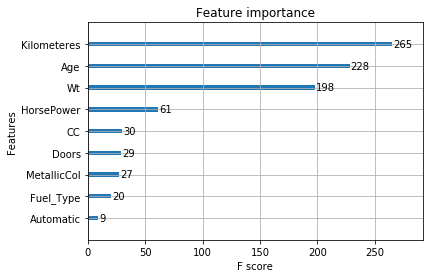

In [11]:
# feature importances
xgb.plot_importance(model)

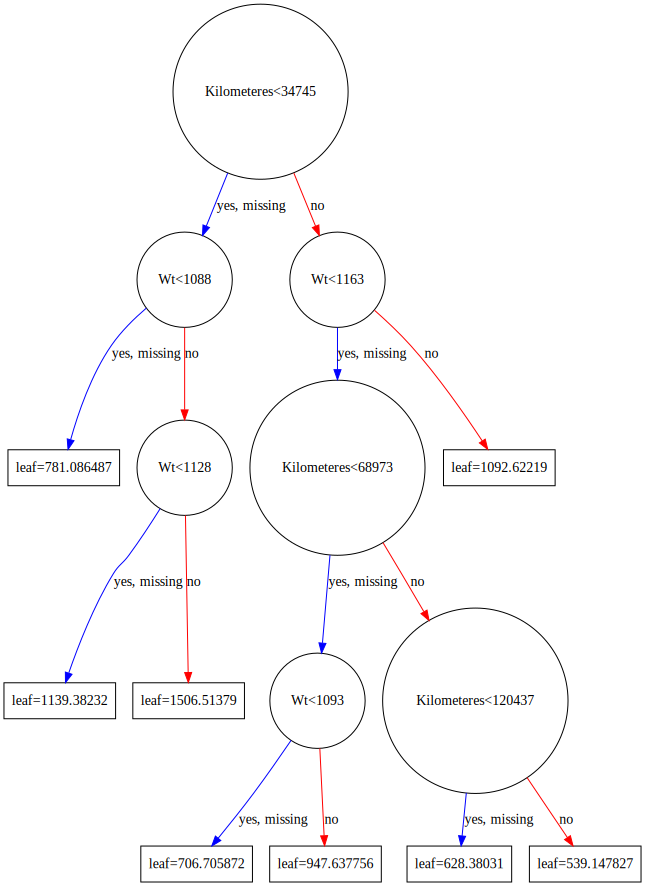

In [12]:
# sample tree from model
xgb.to_graphviz(model)